## Лабораторная работа 3. Визуализация данных. Метод опорных векторов. 

Постарайтесь оформить всю работу как один монолитный рассказ/отчет. Избегайте дублирования кода. Избегайте использования циклов, вместо этого ищите готовый алгоритм в пакетах. Подписывайте все графики, а также их оси, если график содержит несколько кривых, то обязательно пользуйтесь легендой. Также неукоснительно соблюдайте PEP8. За несоблюдение этих простейших правил итоговые баллы могут быть снижены безапелляционно.

### 1. (8 баллов) Pandas and data visualization

![](https://imgs.xkcd.com/comics/convincing.png)

В этом задании вы будете работать с данными из файла ```articles.csv```.

**1. (1 балл)** Bизуализируйте соотношение различных издательств, используя [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-pie).

In [4]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import pie, axis, show

In [2]:
df = pd.read_csv('articles.csv')
df.head()

,id,title,publication,author,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017,6,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017,1,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017,4,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017,1,"SEOUL, South Korea — North Korea’s leader, ..."


In [3]:
publication_dist = np.round(df['publication'].value_counts() / len(df), 4)
publication_dist

Breitbart           0.4756
CNN                 0.2298
New York Times      0.1561
Business Insider    0.1351
Atlantic            0.0034
Name: publication, dtype: float64

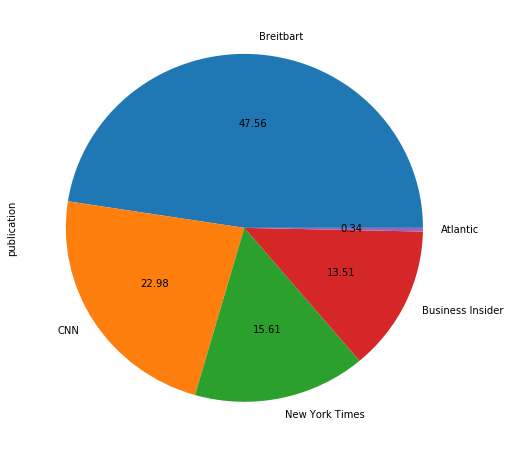

In [4]:
publication_dist.plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f')
show()

**2. (2 балла)** Постройте распределение колличества публикаций каждого издания по каждому году, используя [bar plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

In [5]:
df_groupby_publ_year = df.groupby(['publication', 'year']).size()
df_groupby_publ_year

publication       year
Atlantic          2016       23
                  2017      148
Breitbart         2013        2
                  2014        1
                  2015       72
                  2016    16100
                  2017     7606
Business Insider  2016     4596
                  2017     2161
CNN               2011        1
                  2012       26
                  2013      210
                  2014       74
                  2015     3251
                  2016     4104
                  2017     3822
New York Times    2014        1
                  2015        3
                  2016     3628
                  2017     4171
dtype: int64

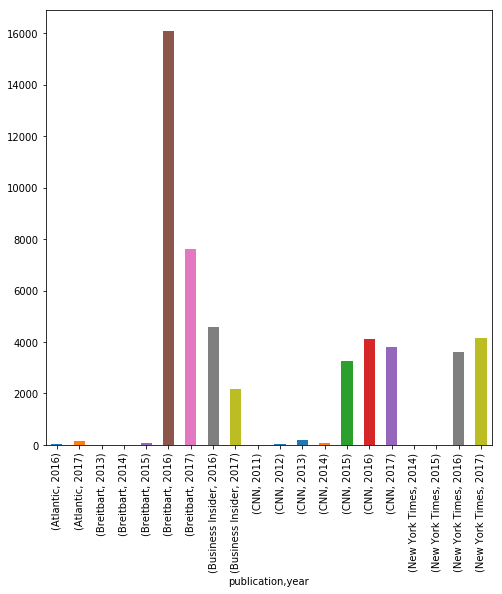

In [6]:
df_groupby_publ_year.plot.bar(figsize=(8, 8))
show()

**3. (3 балла)** Опредилите топ-10 авторов для года с наибольшим количеством публикаций (обратите внимание, что у некоторых статей несколько авторов - это нужно учитывать).

In [11]:
df_groupby_year = df.groupby('year').size()
np.argmax(df_groupby_year)

2016

В 2016 году было издано больше всего публикаций.

Данные об авторах в этот год не очень чистые. 
- избавимся от нанов (2862 объекта)
- приведем по-разному записанных одинаковых авторов  к одному виду
- разобьем соавторов на несколько авторов

In [12]:
df_2016 = df.loc[df['year'] == 2016].reset_index(drop=True)
len(df_2016)

28451

In [14]:
df_2016_nonan_authors = df_2016.dropna(subset=['author']).reset_index(drop=True)
len(df_2016_nonan_authors)

25589

In [8]:
import re
def normalize(author):
    author = author.lstrip()
    author = re.sub('\. ', '.', author)
    author = re.sub('<.*?>', '', author)
    authors = list(set(author.strip(', ').
                       replace(' and ', ',').
                       replace(' &amp ', ',').
                       split(',')))
    return authors

In [15]:
from tqdm import tqdm

In [65]:
for i, author in tqdm(enumerate(df_2016_nonan_authors['author'])):
    df_2016_nonan_authors['author'][i] = normalize(author)

In [5]:
import pickle
# pickle.dump(df_2016_nonan_authors, open("articles_2016_without_nan_authors", "wb"))
# df_2016_nonan_authors = pickle.load(open("articles_2016_without_nan_authors", "rb"))

In [19]:
df_2016_nonan_authors.head()

,id,title,publication,author,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,[Carl Hulse],2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...
1,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,[Katherine Rosman],2016-12-31,2016,12,"Just how is Hillary Kerr, the founder of ..."
2,17292,Calling on Angels While Enduring the Trials of...,New York Times,[Andy Newman],2016-12-31,2016,12,Angels are everywhere in the Muñiz family’s ap...
3,20113,"Clinton, Sanders and the Crowd Bring the Noise...",New York Times,[James Poniewozik],2016-04-16,2016,4,"Thursday night, Democrats did what party peopl..."
4,20114,Yahoo’s Suitors Uncover Few Financial Details ...,New York Times,"[Vindu Goel, Michael J.de la Merced]",2016-04-18,2016,4,SAN FRANCISCO — As Yahoo prepares to accept...


Применим модель мешка слов к признаку author, считая каждого автора отдельным словом:

In [20]:
for i, authors in tqdm(enumerate(df_2016_nonan_authors['author'])):
    for author in authors:
        if author not in df_2016_nonan_authors.columns:
            df_2016_nonan_authors[author] = 0
        df_2016_nonan_authors[author][i] += 1

25589it [36:12, 11.78it/s]


In [21]:
# pickle.dump(df_2016_nonan_authors, open("articles_2016_without_nan_authors_bow", "wb"))
# df_2016_nonan_authors = pickle.load(open("articles_2016_without_nan_authors", "rb"))

In [22]:
df_authors = pd.DataFrame()
df_authors['author'] = ''
df_authors['n'] = ''
rows = []
for column in df_2016_nonan_authors.columns[8:]:
    rows.append([column, sum(df_2016_nonan_authors[column])])
for row in rows:
    df_authors.loc[len(df_authors)] = row

In [24]:
df_authors.head(2)

,author,n
0,Carl Hulse,11
1,Katherine Rosman,1


В выборке всего 1741 автор. Из них в 2016 году больше всего публиковались 10 следующих авторов:

In [25]:
df_authors_sortby_publ = df_authors.sort_values(by=['n'])
df_authors_sortby_publ = df_authors_sortby_publ.reset_index(drop=True)
df_authors_sortby_publ_top10 = df_authors_sortby_publ[-10:]
df_authors_sortby_publ_top10.iloc[::-1]

,author,n
1741,Breitbart News,1321
1740,Pam Key,820
1739,Charlie Spiering,661
1738,Alex Swoyer,589
1737,Daniel Nussbaum,533
1736,AWR Hawkins,525
1735,John Hayward,521
1734,Jerome Hudson,483
1733,Ian Hanchett,429
1732,Joel B.Pollak,420


Breitbart News - самый публикующийся новостной ресурс 2016 года. Pam Key - самый публикующийся автор 2016 года.

**4. (2 балла)** Постройте распределение количества публикаций авторов из предыдущего задания по месяцам, используя [hist plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-hist).

Построим и визуализируем распределение количества публикаций по месяцам для 10 самых публикуемых авторов 2016 года с помощью гистограммы:

In [28]:
df_2016_nonan_authors_groupby_month = df_2016_nonan_authors.groupby('month').sum()
df_2016_nonan_authors_groupby_month_top10 = df_2016_nonan_authors_groupby_month[list(df_authors_sortby_publ_top10['author'])]
df_2016_nonan_authors_groupby_month_top10

,Joel B.Pollak,Ian Hanchett,Jerome Hudson,John Hayward,AWR Hawkins,Daniel Nussbaum,Alex Swoyer,Charlie Spiering,Pam Key,Breitbart News
month,,,,,,,,,,
1,22,53,21,29,53,51,61,56,61,134
2,26,62,22,36,41,42,45,61,61,98
3,23,48,18,47,37,42,47,38,73,148
4,19,39,33,31,37,41,65,60,81,124
5,33,24,48,36,34,47,71,44,75,105
6,26,13,53,38,77,53,47,52,54,114
7,60,39,54,36,52,44,47,20,67,143
8,41,31,66,51,47,45,54,69,69,107
9,44,27,36,69,38,62,44,83,67,99


In [516]:
# df_2016_nonan_authors_groupby_month_top10 = pickle.load(
#   open("articles_2016_without_nan_authors_groupby_month_top10", "rb"))

In [518]:
max_publ_2016 = max(df_2016_nonan_authors_groupby_month_top10.sum(axis=0))
print('Максимальное количество публикаций одного автора в 2016 году: {}'.format(max_publ_2016))

Максимальное количество публикаций одного автора в 2016 году: 1321


In [517]:
df_2016_nonan_authors_groupby_month_top10

,Joel B.Pollak,Ian Hanchett,Jerome Hudson,John Hayward,AWR Hawkins,Daniel Nussbaum,Alex Swoyer,Charlie Spiering,Pam Key,Breitbart News
month,,,,,,,,,,
1,22,53,21,29,53,51,61,56,61,134
2,26,62,22,36,41,42,45,61,61,98
3,23,48,18,47,37,42,47,38,73,148
4,19,39,33,31,37,41,65,60,81,124
5,33,24,48,36,34,47,71,44,75,105
6,26,13,53,38,77,53,47,52,54,114
7,60,39,54,36,52,44,47,20,67,143
8,41,31,66,51,47,45,54,69,69,107
9,44,27,36,69,38,62,44,83,67,99


In [542]:
max_publ_2016_by_month = max(df_2016_nonan_authors_groupby_month_top10.sum(axis=1))
print('Максимальное количество в 1 месяце 2016 года: {}'.format(max_publ_2016_by_month))

Максимальное количество в 1 месяце 2016 года: 580


In [520]:
df_for_hist = pd.DataFrame(np.nan, index=range(max_publ_2016), 
                           columns=df_2016_nonan_authors_groupby_month_top10.columns)
df_for_hist.shape

(1321, 10)

In [521]:
for author in df_2016_nonan_authors_groupby_month_top10.columns:
    j = -1
    for month in range(1, 13):
        for i in range(df_2016_nonan_authors_groupby_month_top10[author][month]):
            j += 1
            df_for_hist[author][j] = month

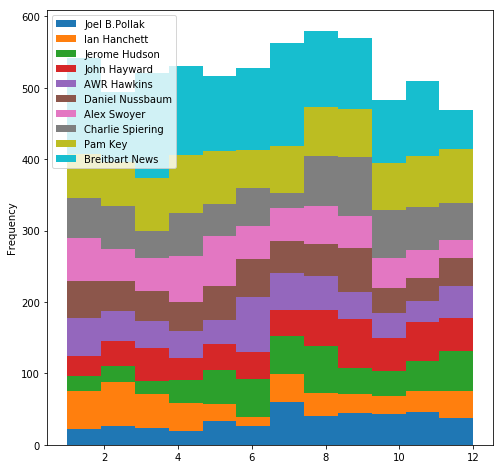

In [541]:
df_for_hist.plot.hist(stacked=True, figsize=(8,8), bins=12)
show()

Визуализируем распределение количества публикаций по месяцам для 10 самых публикуемых авторов 2016 года с помощью гистограммы:

### 2. (12 баллов) Sklearn and support vector machine

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/06/10945756_10202550638602268_6848260291113352290_n.jpg)

В этом задании вы будете работать с данными из из репозитория UCI. Датасет называется [YouTube Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection). На этом датасете вы будете решать задачу определения спама по комментарию к видео-ролику на Youtube.


**1. (2 балла)** Скачайте данные из репозитория UCI (не меняйте названия исходных датасетов!). Объедените все пять таблиц в одну, добавив колонку ```'CLIP'``` с именем исполнителя в клипе. Выведите основную статиску датасета, ответив на вопросы: топ5 самых коротких/длинных комментариев? каково распределение между классами? сколько уникальных авторов комментариев в данных?

In [6]:
import zipfile
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

In [ ]:
# если ссылка работает
url = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00380/YouTube-Spam-Collection-v1.zip")
zf = ZipFile(BytesIO(url.read()))
match = [s for s in zf.namelist() if ".csv" in s and '__MACOSX/.' not in s]
match_clips = [re.findall('.*?-(.*).csv', s)[0] for s in zf.namelist() if ".csv" in s and '__MACOSX/.' not in s]
dfs = []
for csv in match:
    dfs.append(pd.read_csv(zf.open(csv), low_memory=False, encoding='utf-8'))
match

In [9]:
# если ссылка не работает
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('YouTube-Spam-Collection-v1') if isfile(join('YouTube-Spam-Collection-v1', f))
            and ".csv" in f and '__MACOSX/.' not in f]
match_clips = [re.findall('.*?-(.*).csv', s)[0] for s in onlyfiles if ".csv" in s and '__MACOSX/.' not in s]
dfs = []
for csv in onlyfiles:
    dfs.append(pd.read_csv('YouTube-Spam-Collection-v1/' + csv, low_memory=False, encoding='utf-8'))

In [10]:
for i, df in enumerate(dfs):
    df['CLIP'] = match_clips[i]

In [11]:
df = dfs[0].append(dfs[1:])
df = df.reset_index(drop=True)
print(len(df), 'comments')
df.head()

1956 comments


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CLIP
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,Psy
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,Psy
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,Psy
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,Psy
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,Psy


Отсортируем датасет по длине комментария:

In [50]:
df['len_of_content'] = pd.Series([len(i) for i in df['CONTENT']])
df_sorted_by_len_of_content = df.sort_values(by=['len_of_content'])

Топ-5 самых коротких комментариев:

In [51]:
df_sorted_by_len_of_content[:5]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CLIP,len_of_content
1821,_2viQ_Qnc6-M2Gjq_TCThUeRGBbSNsclbeFll-ETDD8,ben mashall,2013-10-02T13:42:21.938000,:),0,Shakira,2
1825,_2viQ_Qnc6_bcubCrs8YncM7B9016OeduR9RR-cKRb4,Kenji Bustalinio,2013-10-02T11:46:51.783000,:),0,Shakira,2
1868,_2viQ_Qnc69saopRmKcZavlgi69aQhlFsDzUkMqZ1xQ,jemy Abdulrahman,2013-09-05T19:30:37.124000,WOw,0,Shakira,3
1462,z13zdpqz0qflhrha104cdxir0pbct3v4iys0k,France Silva,2015-05-21T21:54:55.768000,BR﻿,0,Eminem,3
1934,_2viQ_Qnc6-3Nk200KmVtS-kiCS_1CjKJsMIbXakyfI,hsn moghrbi,2013-07-17T21:14:40.168000,wow,0,Shakira,3


Топ-5 самых длинных комментариев:

In [53]:
for comment in df_sorted_by_len_of_content['CONTENT'][-5:]:
    print(comment)
    print('-'*40)

This great Warning will happen soon. ,0
LneaDw26bFst76VHKJL8PxaEy6VMNlvmriUDTSFK6vY,Ali Paša,2013-09-26T22:28:17.047000,Croatia &lt;3,0
LneaDw26bFvkAHxpKEnM25FYWkyXthsUpri6JuQsZnU,G Belrus,2013-09-26T22:26:12.832000,Nice one,0
LneaDw26bFtvZQt6JUEhasIEFRJG1exI_dVqdnQVPho,exode. comeback.,2013-09-26T22:23:00.710000,600m views.,0
LneaDw26bFunOarAg71AwGU6TJO6aZDKFIUn_TZ1_HY,Muhammad Shaeel Abbas,2013-09-26T22:15:45.476000,Fuck off!,0
LneaDw26bFt-oToUFj0z3vffLFNaxyKwZSIVQhiMx-E,Notorious Niko,2013-09-26T22:00:43.613000,"Hey guys im a 17yr old rapper trying to get exposure... I live in belgium where NO ONE speaks english so i have to resort to this gay SPAM...  Check out my 2 latest tracks as they are probably my best.. Audio isnt the best but im gonna invest in some real equipment for my next track..  Please Thumbs this up so others can see.. or hey dont just check me out yourself and leave a response and a like :D  Thanks in advance, you guys will be part of making my dream come TRUE   -No

In [54]:
print('Labels of classes:', np.unique(df['CLASS']))
print('Class distribution:',
      np.round(df['CLASS'].value_counts() / len(df), 2), sep='\n')

Labels of classes: [0 1]
Class distribution:
1    0.51
0    0.49
Name: CLASS, dtype: float64


In [56]:
print(len(np.unique(df['AUTHOR'])), 'authors of comments')

1792 authors of comments


Классы распределены практически равномерно: 49% выборки является неспамом и 51& - спамом. Самые короткие комментари - смайлики и междометия, самые длинные - спам и ссылки. Всего 1792 автора на 1956 комментариев.

**2. (2 балла)** Перед тем как воспользоваться методом главных компонент на текстовых данных их надо преобразовать в числовые. В этом задании вам предется самим разобраться с простой векторной моделью ```bag of words```. В этом вам помогут ссылки [wiki](https://en.wikipedia.org/wiki/Bag-of-words_model), [stackoverflow](https://stackoverflow.com/questions/44083683/countvectorizer-with-pandas-dataframe), [github](https://gist.github.com/kovid-rathee/3bdd9334409d583e6ee6430b8e45516d). Создайте векторное представление колонки ```'CONTENT'```, для этого используйте [sklearn.feature_extraction.text.CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). В конструкторе задайте параметры ```lowercase=True```, ```stop_words='english'```. Полученное преобразование занесите в переменную `X`. Также отделите от исходного датафрейма целевую метку класса в переменную `y`. Разбейте данные на обучающую и тестовую выборки в отношении `7:3`, добавьте сответственно суффиксы `train` и `test` к переменным `X` и `y`.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [27]:
def myCountVectorizer(df):
    tf_vectorizer = CountVectorizer(lowercase=True,
                                stop_words='english')
    tf = tf_vectorizer.fit_transform(df['CONTENT'])
    X = pd.DataFrame()
    for i, col in tqdm(enumerate(tf_vectorizer.get_feature_names())):
        X[col] = pd.SparseSeries(tf[:, i].toarray().ravel(), fill_value=0)
    y = df['CLASS']
    return X, y

In [86]:
X, y = myCountVectorizer(df)

4229it [01:11, 58.75it/s] 


In [87]:
X.shape

(1956, 4229)

In [14]:
# pickle.dump(X, open("df_Youtube_CountVect", "wb"))
X = pickle.load(open("df_Youtube_CountVect", "rb"))
y = df['CLASS']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**3. (4 балла)** Обучите метод опорных векторов с различными гиперпараметрами на данных полученных в предыдущем задании. Для этого используйте класс [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) с общим параметром `class_weight='balanced'`. Для перебора параметров используйте [sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с параметрами `cv=5`, `scoring='accuracy'`. Используйте разные ядра:

- `kernel='linear'`, `C=[1.e-4, 1.e-3, 1.e-2, 1.e-1, 1, 2, 10, 50, 100, 1000]`
- `kernel='rbf'`, `C=[...]`, `gamma=['auto', 1.e-4, 1.e-3, 1.e-2, 1.e-2]`
- `kernel='poly'`, `C=[...]`, `degree=[2, 3, 5, 11]`

Ответьте на вопросы. Для каких гиперпараметров модели получились переобученными? Модели с каким ядром работают хуже/лучше? Как вы думаете почему?

Выберите лучшую модель и ответьте на вопросы. Сколько опорных векторов в модели? Выведите комментарии, соответствующие опорным векторам-нарушителям, граничным опорным векторам. Для тестовых данных найдите комментарии с наибольшим и наименьшим отступом от разделяющей гиперплоскости. Объясните почему получаются такие результаты. Найдите топ10 слов наиболее голосующих за спамные комментарии. Также объясните почему получаются такие результаты.

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [17]:
svc_params_linear = {'kernel': ['linear'],
                     'C': [1.e-4, 1.e-3, 1.e-2, 1.e-1, 1, 2, 10, 50, 100, 1000]}
svc_params_rbf = {'kernel': ['rbf'],
                  'C': [1.e-4, 1.e-3, 1.e-2, 1.e-1, 1, 2, 10, 50, 100, 1000],
                  'gamma': ['auto', 1.e-4, 1.e-3, 1.e-2]}
svc_params_poly = {'kernel': ['poly'],
                   'C': [1.e-4, 1.e-3, 1.e-2, 1.e-1, 1, 2, 10, 50, 100, 1000],
                   'degree': [2, 3, 5, 11]}
kernels = ['linear', 'rbf', 'poly']
# 90 комбинаций

In [27]:
def add_metrics(metrics, value, name, kernel):
    metrics.loc[name, kernel] = value

In [30]:
best_metrics = pd.DataFrame()
best_clfs = dict()
clfs = dict()
for i, params in enumerate([svc_params_linear, svc_params_rbf, svc_params_poly]):
    clf = GridSearchCV(SVC(class_weight='balanced'), params, error_score=0, verbose=10, 
                       cv=5, scoring='accuracy', n_jobs=4)
    clf = clf.fit(X_train, y_train)
    clfs[params['kernel'][0]] = clf
    add_metrics(best_metrics, clf.best_score_, 'comment_cv', params['kernel'][0])
    best_clfs[params['kernel'][0]] = clf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.0001, kernel=linear .........................................
[CV] C=0.0001, kernel=linear .........................................
[CV] C=0.0001, kernel=linear .........................................
[CV] C=0.0001, kernel=linear .........................................
[CV]  C=0.0001, kernel=linear, score=0.4927007299270073, total=  16.2s
[CV]  C=0.0001, kernel=linear, score=0.4927007299270073, total=  16.3s
[CV] C=0.0001, kernel=linear .........................................
[CV]  C=0.0001, kernel=linear, score=0.4927007299270073, total=  16.4s
[CV] C=0.001, kernel=linear ..........................................
[CV] C=0.001, kernel=linear ..........................................
[CV]  C=0.0001, kernel=linear, score=0.4927007299270073, total=  16.7s
[CV] C=0.001, kernel=linear ..........................................
[CV]  C=0.0001, kernel=linear, score=0.4908424908424908, total=  16.0s


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   53.8s


[CV] .. C=0.001, kernel=linear, score=0.551094890510949, total=  15.8s
[CV] C=0.001, kernel=linear ..........................................
[CV] . C=0.001, kernel=linear, score=0.5218978102189781, total=  16.0s
[CV] C=0.001, kernel=linear ..........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.001, kernel=linear, score=0.583941605839416, total=  16.5s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8540145985401459, total=  12.9s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8467153284671532, total=  13.3s


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.3min


[CV] . C=0.001, kernel=linear, score=0.5401459854014599, total=  16.2s
[CV] C=0.01, kernel=linear ...........................................
[CV] . C=0.001, kernel=linear, score=0.5494505494505495, total=  16.1s
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.1, kernel=linear ............................................
[CV] .... C=0.1, kernel=linear, score=0.916058394160584, total=   9.4s
[CV] ... C=0.01, kernel=linear, score=0.864963503649635, total=  12.4s
[CV] C=0.1, kernel=linear ............................................
[CV] C=0.1, kernel=linear ............................................
[CV] .. C=0.01, kernel=linear, score=0.8905109489051095, total=  12.2s
[CV] C=0.1, kernel=linear ............................................
[CV] .. C=0.01, kernel=linear, score=0.8754578754578755, total=  12.4s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.9233576642335767, total=   9.7s


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.9min


[CV] ... C=0.1, kernel=linear, score=0.9197080291970803, total=   9.2s
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] .... C=0.1, kernel=linear, score=0.927007299270073, total=   9.5s
[CV] C=1, kernel=linear ..............................................
[CV] ... C=0.1, kernel=linear, score=0.9267399267399268, total=  10.1s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9416058394160584, total=   8.6s
[CV] ..... C=1, kernel=linear, score=0.9525547445255474, total=   8.3s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9416058394160584, total=   8.3s
[CV] C=2, kernel=linear ..............................................
[CV] C=2, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9525547445255474, total=   9.8s


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.2min


[CV] C=2, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9560439560439561, total=  10.4s
[CV] ..... C=2, kernel=linear, score=0.9416058394160584, total=   8.9s
[CV] C=2, kernel=linear ..............................................
[CV] ..... C=2, kernel=linear, score=0.9562043795620438, total=   8.4s
[CV] C=2, kernel=linear ..............................................
[CV] C=10, kernel=linear .............................................
[CV] ..... C=2, kernel=linear, score=0.9343065693430657, total=   8.9s
[CV] C=10, kernel=linear .............................................
[CV] ..... C=2, kernel=linear, score=0.9562043795620438, total=   8.2s
[CV] ..... C=2, kernel=linear, score=0.9560439560439561, total=   7.7s
[CV] C=10, kernel=linear .............................................
[CV] .... C=10, kernel=linear, score=0.9416058394160584, total=   7.6s
[CV] C=10, kernel=linear .............................................
[CV] C

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  9.7min


[CV] .... C=10, kernel=linear, score=0.9452554744525548, total= 7.1min
[CV] C=50, kernel=linear .............................................
[CV] .... C=10, kernel=linear, score=0.9523809523809523, total= 7.1min
[CV] C=50, kernel=linear .............................................
[CV] C=50, kernel=linear .............................................
[CV] .... C=50, kernel=linear, score=0.9416058394160584, total= 7.1min
[CV] C=50, kernel=linear .............................................
[CV] .... C=50, kernel=linear, score=0.9379562043795621, total=   7.9s
[CV] C=100, kernel=linear ............................................
[CV] .... C=50, kernel=linear, score=0.9087591240875912, total=   7.5s
[CV] .... C=50, kernel=linear, score=0.9379562043795621, total=   7.2s
[CV] C=100, kernel=linear ............................................
[CV] C=100, kernel=linear ............................................
[CV] .... C=50, kernel=linear, score=0.9523809523809523, total=   8.2s
[CV] C

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 10.1min


[CV] C=100, kernel=linear ............................................
[CV] ... C=100, kernel=linear, score=0.9087591240875912, total=   7.4s
[CV] C=1000, kernel=linear ...........................................
[CV] C=1000, kernel=linear ...........................................
[CV] ... C=100, kernel=linear, score=0.9379562043795621, total=   8.6s
[CV] C=1000, kernel=linear ...........................................
[CV] ... C=100, kernel=linear, score=0.9523809523809523, total=   7.7s
[CV] C=1000, kernel=linear ...........................................
[CV] .. C=1000, kernel=linear, score=0.9379562043795621, total=   6.9s
[CV] .. C=1000, kernel=linear, score=0.9416058394160584, total=   7.9s
[CV] C=1000, kernel=linear ...........................................
[CV] .. C=1000, kernel=linear, score=0.9087591240875912, total=   7.5s
[CV] .. C=1000, kernel=linear, score=0.9379562043795621, total=   5.7s
[CV] .. C=1000, kernel=linear, score=0.9523809523809523, total=   5.5s


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 10.5min finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.4927007299270073, total=  15.9s
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.4927007299270073, total=  16.3s
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.4927007299270073, total=  16.6s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.4927007299270073, total=  16.8s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.49

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   56.1s


[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  16.8s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  16.7s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  17.2s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total= 1.9min
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.4908424908424908, total= 1.9min
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  3.1min


[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.4927007299270073, total= 1.9min
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.4927007299270073, total= 1.9min
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.4927007299270073, total=  16.5s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.4927007299270073, total=  16.6s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.4908424908424908, total=  16.7s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  17.1s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV]  C=0.0001, ga

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  4.1min


[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  19.7s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  19.3s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.4908424908424908, total=  19.8s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV]  C=0.001, gamma=auto, kernel=rbf, score=0.4927007299270073, total= 1.0min
[CV]  C=0.001, gamma=auto, kernel=rbf, score=0.4927007299270073, total= 1.0min
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV]  C=0.001, gamma=auto, kernel=rbf, score=0.4927007299270073, total= 1.0min
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV]  C=0.001, gamma=auto,

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  5.4min


[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV]  C=0.001, gamma=auto, kernel=rbf, score=0.4908424908424908, total=  17.0s
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  16.5s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  16.1s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  17.1s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  16.3s
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.4908424908424908, total=  16.1s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.4927007299270073, total=  16.5s
[CV] C=0.0

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  6.8min


[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.4927007299270073, total=  15.8s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.4908424908424908, total=  16.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  17.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  15.9s
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  15.7s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  16.2s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.01, 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  7.7min


[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=auto, kernel=rbf, score=0.4927007299270073, total=  15.9s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=auto, kernel=rbf, score=0.4927007299270073, total=  16.8s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=auto, kernel=rbf, score=0.4908424908424908, total=  15.3s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  15.2s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  15.7s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  16.9s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.0001, k

[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  9.4min


[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.4927007299270073, total=  32.3s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.4908424908424908, total=  35.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  36.4s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  16.9s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  16.7s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.4927007299270073, total=  17.6s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.01, kernel=

[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 10.5min


[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=auto, kernel=rbf, score=0.4908424908424908, total=  16.2s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  16.2s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  17.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  17.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  15.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.4908424908424908, total=  15.8s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kerne

[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 12.1min


[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6459854014598541, total=  14.7s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.656934306569343, total=  15.2s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6190476190476191, total=  15.3s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=1, gamma=auto, kernel=rbf, score=0.4927007299270073, total=  15.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=1, gamma=auto, kernel=rbf, score=0.49635036496350365, total=  15.8s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=auto, kernel=rbf, score=0.4927007299270073, total=  16.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=auto, kernel=rbf, score=0.4927

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 13.5min


[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.6131386861313869, total=  15.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.5948905109489051, total=  15.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.6386861313868614, total=  15.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.6277372262773723, total=  15.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8941605839416058, total=  12.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.6117216117216118, total=  15.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.91605

[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 15.1min


[CV] C=2, gamma=0.0001, kernel=rbf ...................................
[CV]  C=2, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  15.6s
[CV]  C=2, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  15.5s
[CV] C=2, gamma=0.0001, kernel=rbf ...................................
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV]  C=2, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  16.0s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV]  C=2, gamma=0.0001, kernel=rbf, score=0.4927007299270073, total=  15.4s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV]  C=2, gamma=0.001, kernel=rbf, score=0.8065693430656934, total=  13.7s
[CV]  C=2, gamma=0.0001, kernel=rbf, score=0.4908424908424908, total=  15.3s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV]  C=2, gamma=0.001, kernel=rbf, score=

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 16.3min


[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=auto, kernel=rbf, score=0.8284671532846716, total=  17.5s
[CV]  C=10, gamma=auto, kernel=rbf, score=0.7737226277372263, total=  17.6s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=auto, kernel=rbf, score=0.8357664233576643, total=  19.6s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=auto, kernel=rbf, score=0.8467153284671532, total=  19.8s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=auto, kernel=rbf, score=0.8095238095238095, total=  17.8s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.6167883211678832, total=  19.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0

[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 18.2min


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9379562043795621, total=   8.8s
[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9525547445255474, total=   9.2s
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9523809523809523, total=   9.2s
[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV]  C=50, gamma=auto, kernel=rbf, score=0.8795620437956204, total=  11.4s
[CV]  C=50, gamma=auto, kernel=rbf, score=0.9087591240875912, total=  10.8s
[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV]  C=50, gamma=auto, kernel=rbf, score=0.9124087591240876, total=  10.5s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................
[CV] C=50, gamma=0.0001, kernel=rbf ..................................
[CV]  C=50, gamma=auto, kernel=rbf, score=0.930

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 19.4min


[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV]  C=50, gamma=0.001, kernel=rbf, score=0.9267399267399268, total=   9.0s
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.9452554744525548, total=   9.1s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.9525547445255474, total=   8.5s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.9452554744525548, total=   8.3s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.9635036496350365, total=   8.3s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.9523809523809523, total=   8.5s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=100, gamma=auto, kernel=rbf, score=0.8

[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 20.8min


[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.948905109489051, total=   8.7s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9523809523809523, total=   9.2s
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9525547445255474, total=   9.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9525547445255474, total=   8.7s
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9416058394160584, total=   8.1s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9671532846715328, total=   8.5s
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9597069597069597, total=   8.4s
[CV] C=1000, gamma=auto, kernel=rb

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 21.8min


[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9379562043795621, total=   7.9s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9598540145985401, total=   8.0s
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9560439560439561, total=   7.6s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.9525547445255474, total=   8.8s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.9452554744525548, total=   7.9s
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.9124087591240876, total=   7.2s
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.9452554744525548, total=   7.0s
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.9560439560439561, total=   7.4s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 22.2min finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV]  C=0.0001, degree=2, kernel=poly, score=0.4927007299270073, total=  15.2s
[CV]  C=0.0001, degree=2, kernel=poly, score=0.4927007299270073, total=  15.7s
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV]  C=0.0001, degree=2, kernel=poly, score=0.4927007299270073, total=  16.0s
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV]  C=0.0001, degree=2, kernel=poly, score=0.4927007299270073, total=  16.2s
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV]  C=0.0001, degree=2, kernel=poly, score=0.4908424

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   51.9s


[CV]  C=0.0001, degree=3, kernel=poly, score=0.4927007299270073, total=  15.5s
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV]  C=0.0001, degree=3, kernel=poly, score=0.4927007299270073, total=  15.3s
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=3, kernel=poly, score=0.4927007299270073, total=  16.1s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=3, kernel=poly, score=0.4927007299270073, total=  15.3s
[CV]  C=0.0001, degree=3, kernel=poly, score=0.4908424908424908, total=  15.2s
[CV] C=0.0001, degree=5, kernel=poly .................................


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.3min


[CV]  C=0.0001, degree=5, kernel=poly, score=0.4927007299270073, total=  15.1s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.4927007299270073, total=  15.9s
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.4927007299270073, total=  15.6s
[CV]  C=0.0001, degree=5, kernel=poly, score=0.4927007299270073, total=  15.3s
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.4908424908424908, total=  15.3s
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV]  C=0.0001, degree=11, kernel=poly, score=0.4927007299270073, total=  16.5s
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV]  C=0.0001, degree=11, k

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.2min


[CV]  C=0.0001, degree=11, kernel=poly, score=0.4927007299270073, total=  15.2s
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV]  C=0.0001, degree=11, kernel=poly, score=0.4927007299270073, total=  15.4s
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV]  C=0.0001, degree=11, kernel=poly, score=0.4908424908424908, total=  16.9s
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV]  C=0.001, degree=2, kernel=poly, score=0.4927007299270073, total=  15.3s
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV]  C=0.001, degree=2, kernel=poly, score=0.4927007299270073, total=  15.2s
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=2, kernel=poly, score=0.4927007299270073, total=  15.2s
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=2, kern

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.7min


[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=2, kernel=poly, score=0.4908424908424908, total=  15.3s
[CV]  C=0.001, degree=3, kernel=poly, score=0.4927007299270073, total=  15.1s
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=3, kernel=poly, score=0.4927007299270073, total=  15.5s
[CV] C=0.001, degree=5, kernel=poly ..................................
[CV]  C=0.001, degree=3, kernel=poly, score=0.4927007299270073, total=  17.1s
[CV] C=0.001, degree=5, kernel=poly ..................................
[CV]  C=0.001, degree=3, kernel=poly, score=0.4927007299270073, total=  15.1s
[CV]  C=0.001, degree=3, kernel=poly, score=0.4908424908424908, total=  15.2s
[CV] C=0.001, degree=5, kernel=poly ..................................
[CV] C=0.001, degree=5, kernel=poly ..................................
[CV]  C=0.001, degree=5, kernel=pol

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.0min


[CV]  C=0.001, degree=5, kernel=poly, score=0.4927007299270073, total=  16.9s
[CV] C=0.001, degree=11, kernel=poly .................................
[CV] C=0.001, degree=11, kernel=poly .................................
[CV]  C=0.001, degree=5, kernel=poly, score=0.4908424908424908, total=  18.2s
[CV] C=0.001, degree=11, kernel=poly .................................
[CV]  C=0.001, degree=11, kernel=poly, score=0.4927007299270073, total=  20.9s
[CV] C=0.001, degree=11, kernel=poly .................................
[CV]  C=0.001, degree=11, kernel=poly, score=0.4927007299270073, total=  19.4s
[CV]  C=0.001, degree=11, kernel=poly, score=0.4927007299270073, total=  19.1s
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV]  C=0.001, degree=11, kernel=poly, score=0.4927007299270073, total=  20.5s
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV]  C=0.001, degree=11, kerne

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.1min


[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=2, kernel=poly, score=0.4927007299270073, total=  20.6s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=2, kernel=poly, score=0.4927007299270073, total=  20.5s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=2, kernel=poly, score=0.4908424908424908, total=  19.3s
[CV]  C=0.01, degree=3, kernel=poly, score=0.4927007299270073, total=  19.0s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, score=0.4927007299270073, total=  21.2s
[CV] C=0.01, degree=5, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, score=0.4927007299270073, total=  20.7s
[CV] C=0.01, degree=5, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, scor

[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  6.7min


[CV] C=0.01, degree=11, kernel=poly ..................................
[CV]  C=0.01, degree=5, kernel=poly, score=0.4927007299270073, total=  20.1s
[CV] C=0.01, degree=11, kernel=poly ..................................
[CV]  C=0.01, degree=5, kernel=poly, score=0.4908424908424908, total=  21.3s
[CV] C=0.01, degree=11, kernel=poly ..................................
[CV]  C=0.01, degree=11, kernel=poly, score=0.4927007299270073, total=  20.4s
[CV] C=0.01, degree=11, kernel=poly ..................................
[CV]  C=0.01, degree=11, kernel=poly, score=0.4927007299270073, total=  19.8s
[CV]  C=0.01, degree=11, kernel=poly, score=0.4927007299270073, total=  19.5s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.01, degree=11, kernel=poly, score=0.4927007299270073, total=  18.7s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.01, degree=11, kernel=poly,

[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  7.9min


[CV] C=0.1, degree=3, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.4908424908424908, total=  15.6s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.4927007299270073, total=  15.6s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.4927007299270073, total=  16.3s
[CV] C=0.1, degree=5, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.4927007299270073, total=  16.2s
[CV] C=0.1, degree=5, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.4927007299270073, total=  15.5s
[CV] C=0.1, degree=5, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.4908424908424908, total=  15.6s
[CV] C=0.1, degree=5, kernel=poly ....................................
[CV]  C=0.1, degree=5, kernel=poly, score=0.492

[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  9.3min


[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=0.1, degree=11, kernel=poly, score=0.4927007299270073, total=  15.9s
[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=0.1, degree=11, kernel=poly, score=0.4927007299270073, total=  16.2s
[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=0.1, degree=11, kernel=poly, score=0.4908424908424908, total=  16.1s
[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=1, degree=2, kernel=poly, score=0.4927007299270073, total=  15.8s
[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=1, degree=2, kernel=poly, score=0.4927007299270073, total=  15.6s
[CV] C=1, degree=3, kernel=poly ......................................
[CV]  C=1, degree=2, kernel=poly, score=0.4927007299270073, total=  15.6s
[CV] C=1, degree=3, kernel=poly ......................................
[CV]  C=1, degree=2, kernel=poly, score=0.49270072

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 10.6min


[CV] C=1, degree=5, kernel=poly ......................................
[CV]  C=1, degree=5, kernel=poly, score=0.4927007299270073, total=  16.2s
[CV] C=1, degree=5, kernel=poly ......................................
[CV]  C=1, degree=5, kernel=poly, score=0.4927007299270073, total=  17.3s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=5, kernel=poly, score=0.4927007299270073, total=  17.2s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=5, kernel=poly, score=0.4927007299270073, total=  17.7s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=5, kernel=poly, score=0.4908424908424908, total=  15.9s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=11, kernel=poly, score=0.4927007299270073, total=  16.0s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=11, kernel=poly, score=0.492700729927007

[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 12.3min


[CV] C=2, degree=3, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.4927007299270073, total=  16.5s
[CV] C=2, degree=3, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.4927007299270073, total=  15.9s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.4927007299270073, total=  15.9s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.4927007299270073, total=  16.0s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.4908424908424908, total=  16.8s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=5, kernel=poly, score=0.4927007299270073, total=  15.2s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=5, kernel=poly, score=0.4927007299270073,

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 14.0min


[CV] C=10, degree=2, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.4927007299270073, total=  16.1s
[CV] C=10, degree=2, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.4927007299270073, total=  17.0s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.4927007299270073, total=  15.4s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.4927007299270073, total=  15.3s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.4908424908424908, total=  16.3s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=3, kernel=poly, score=0.4927007299270073, total=  16.8s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=3, kernel=poly, score=0.4927007299

[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 15.8min


[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=10, degree=11, kernel=poly, score=0.4927007299270073, total=  16.5s
[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=10, degree=11, kernel=poly, score=0.4927007299270073, total=  18.4s
[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=10, degree=11, kernel=poly, score=0.4908424908424908, total=  18.8s
[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=50, degree=2, kernel=poly, score=0.4927007299270073, total=  21.7s
[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=50, degree=2, kernel=poly, score=0.4927007299270073, total=  21.7s
[CV] C=50, degree=3, kernel=poly .....................................
[CV]  C=50, degree=2, kernel=poly, score=0.4927007299270073, total=  19.6s
[CV] C=50, degree=3, kernel=poly .....................................
[CV]  C=50, degree=2, kernel=poly, score=0.4927007

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 18.1min


[CV] C=50, degree=11, kernel=poly ....................................
[CV]  C=50, degree=5, kernel=poly, score=0.5091575091575091, total=  19.5s
[CV] C=50, degree=11, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.4927007299270073, total=  20.1s
[CV] C=50, degree=11, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.4927007299270073, total=  20.3s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.4927007299270073, total=  20.1s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.4927007299270073, total=  19.5s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.5091575091575091, total=  19.6s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=100, degree=2, kernel=poly, score=0.4927

[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 20.6min


[CV] C=100, degree=11, kernel=poly ...................................
[CV]  C=100, degree=5, kernel=poly, score=0.4927007299270073, total=  15.7s
[CV] C=100, degree=11, kernel=poly ...................................
[CV]  C=100, degree=5, kernel=poly, score=0.5091575091575091, total=  16.1s
[CV] C=100, degree=11, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, score=0.4927007299270073, total=  17.2s
[CV] C=100, degree=11, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, score=0.4927007299270073, total=  16.8s
[CV] C=1000, degree=2, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, score=0.4927007299270073, total=  16.4s
[CV] C=1000, degree=2, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, score=0.4927007299270073, total=  16.1s
[CV] C=1000, degree=2, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, score=

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 22.7min


[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=5, kernel=poly, score=0.4927007299270073, total=  16.3s
[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=5, kernel=poly, score=0.4927007299270073, total=  16.1s
[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=5, kernel=poly, score=0.4908424908424908, total=  17.3s
[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=11, kernel=poly, score=0.4927007299270073, total=  20.8s
[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=11, kernel=poly, score=0.4927007299270073, total=  22.2s
[CV]  C=1000, degree=11, kernel=poly, score=0.4927007299270073, total=  21.9s
[CV]  C=1000, degree=11, kernel=poly, score=0.4927007299270073, total=  20.3s
[CV]  C=1000, degree=11, kernel=poly, score=0.4908424908424908, total=  18.6s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 23.8min finished


In [31]:
# pickle.dump(best_metrics, open("best_metrics", "wb"))
# pickle.dump(clfs, open("clfs", "wb"))
# pickle.dump(best_clfs, open("best_clfs", "wb"))

In [105]:
def overfitting_add(df, params, delta):
    df = df.append(params, ignore_index=True)
    df.iloc[-1]['accuracy'] = delta
    return df

In [106]:
overfitting = pd.DataFrame()
for kernel in clfs:
    results = clfs[kernel].cv_results_
    for i in range(len(results['mean_train_score'])):
        delta = results['mean_test_score'][i] - results['mean_train_score'][i]
        if delta < 0:
            overfitting = overfitting_add(overfitting, results['params'][i], delta)

In [108]:
overfitting.sort_values('accuracy').head(10)

,C,accuracy,delta_accuracy,kernel,gamma,degree
6,50.000,-0.062820,-0.062820,linear,NaN,NaN
7,100.000,-0.062820,-0.062820,linear,NaN,NaN
8,1000.000,-0.062820,-0.062820,linear,NaN,NaN
32,1000.000,-0.056246,-0.056246,rbf,0.01,NaN
5,10.000,-0.054237,-0.054237,linear,NaN,NaN
3,1.000,-0.049123,-0.049123,linear,NaN,NaN
4,2.000,-0.049123,-0.049123,linear,NaN,NaN
29,1000.000,-0.046202,-0.046202,rbf,auto,NaN
24,50.000,-0.046202,-0.046202,rbf,0.01,NaN
31,1000.000,-0.046202,-0.046202,rbf,0.001,NaN


Переобучение происходит при больших С (чем больше С, тем слабее регуляризация, поскольку С в знаменателе в формуле).

In [32]:
best_metrics

,linear,rbf,poly
comment_cv,0.948868,0.954711,0.512783


Модели с линейным и радиальным ядрами имеют очень хорошую предсказательную способность и сравнимы между собой по качеству, в то время как предсказания модели с полиномиальным ядром сравнимы с предсказаниями монетки. Так как мы обучаемся на векторизованных текстах, то размерность данных очень большая поэтому линейная и квадратичная функции работают хорошо, а полиномиальное ядро избыточно и порождает огромное количество ненужных признаков с разреженными значениями, что приводит к переобучению.

In [126]:
# best_clfs = pickle.load(open("best_clfs", "rb"))
clf_best = best_clfs['rbf']
print(clf_best, '\n')
print('Кол-во опорных векторов для двух классов: ', clf_best.n_support_)

SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

Кол-во опорных векторов для двух классов:  [258 154]


Лучшей моделью оказалась модель с ядром rbf, коэффициентом регуляризации C=100 и gamma=0.01. Модель имеет 412 опорных векторов (258 для класса 0 и 154 для класса 1).

#Выведите комментарии, соответствующие опорным векторам-нарушителям, граничным опорным векторам. 
#Для тестовых данных найдите комментарии с наибольшим и наименьшим отступом от разделяющей гиперплоскости. Объясните #почему получаются такие результаты. 
#Найдите топ10 слов наиболее голосующих за спамные комментарии. Также объясните почему получаются такие результаты.

**4. (2 балла)** В прошлом задании мы учитывали только сам комментарий для классификации и не учитывали другую информацию из исходной таблицы. Добавьте новые признаки: ``'YEAR'``, ``'MONTH'``, `'DAY'` - в качестве вещественных признаков; `'CLIP'` - в качестве категориального признака, используя `one-hot encoding`; `'AUTHOR'` - в рамках модели `bag of words`. Обучите на новых данных метод опорных векторов с гиперпараметрами лучшего классификатора предыдущего задания. Ответьте на вопросы. Как изменились результаты? Как вы думаете почему?

In [149]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [151]:
def year(data):
    if data == 0:
        return data
    else:
        return int(str(data)[:4])
    
def month(data):
    if data == 0:
        return data
    else:
        return int(str(data)[5:7])

def day(data):
    if data == 0:
        return data
    else:
        return int(str(data)[8:10])

In [200]:
def enc_bow(df, X, author):
    enc = OneHotEncoder()
    le = preprocessing.LabelEncoder()
    
    CLIP_le = pd.DataFrame(df['CLIP']).apply(le.fit_transform)
    enc_clip_df = pd.DataFrame(enc.fit_transform(CLIP_le).toarray()).to_sparse()
    
    X['YEAR'] = pd.SparseArray(pd.Series([year(data) for data in list(df['DATE'])]))
    X['MONTH'] = pd.SparseArray(pd.Series([month(data) for data in list(df['DATE'])]))
    X['DAY'] = pd.SparseArray(pd.Series([day(data) for data in list(df['DATE'])]))
    
    if author == 'cv':
        vectorizer = CountVectorizer()
        author_cv = vectorizer.fit_transform(df['AUTHOR'])
        author_cv_df = pd.DataFrame(author_cv.toarray()).to_sparse()
        X = pd.concat([X, author_cv_df], axis=1)
    
    if author == 'enc':
        author_le = pd.DataFrame(df['AUTHOR']).apply(le.fit_transform)
        enc_author_df = pd.DataFrame(enc.fit_transform(author_le).toarray()).to_sparse()
        X = pd.concat([X, enc_author_df], axis=1)
    
    return X

In [167]:
df.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
CLIP            0
dtype: int64

Поскольку мы будем работать с признаком даты, в котором в изначальном датасете были пропущены значения, попробуем обучить модель а) на данных без пропусков и б) на данных с заполненными пропусками (скажем, значением 0):

In [201]:
df_nonan = df.dropna()
X_nonan, y_nonan = myCountVectorizer(df_nonan)
X_nonan.shape

3634it [00:54, 66.82it/s] 


(1711, 3634)

In [202]:
df_nan0 = df.fillna(0)
X_nan0, y_nan0 = myCountVectorizer(df_nan0)
X_nan0.shape

4229it [01:06, 64.02it/s] 


(1956, 4229)

In [203]:
X_nonan = enc_bow(df_nonan, X_nonan, 'cv')
y_nonan = df_nonan['CLASS']
X_nonan.shape

(1711, 6306)

In [204]:
X_nan0_author_cv = enc_bow(df_nan0, X_nan0, 'cv')
y_nan0_author_cv = df_nan0['CLASS']
X_nan0_author_cv.shape

(1956, 7128)

In [205]:
X_nan0_author_enc = enc_bow(df_nan0, X_nan0, 'enc')
y_nan0_author_enc = df_nan0['CLASS']
X_nan0_author_enc.shape

(1956, 6024)

In [197]:
def myaccuracy(X, y, clf):
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)
    clf_best.fit(X_train, y_train)
    accuracy = accuracy_score(clf_best.predict(X_test), y_test)
    return accuracy

In [206]:
metrics = pd.DataFrame()
Xs = ['nonan', 'nan0_author_cv', 'nan0_author_enc']
ys = [y_nonan, y_nan0, y_nan0]
for i, X in enumerate([X_nonan, X_nan0_author_cv, X_nan0_author_enc]):
    add_metrics(metrics, myaccuracy(X, ys[i], clf_best), Xs[i], 'accuracy')

In [ ]:
accuracy_score(clf_best.predict(X_test), y_test)

In [207]:
metrics

,accuracy
nonan,0.941634
nan0_author_cv,0.950596
nan0_author_enc,0.957411


In [13]:
np.unique(df[pd.isnull(df['DATE'])]['CLASS'])

array([1])

Модель, обученная на датафрейме с сохраненные пропусками, замененными на какое-то значение (в данном случае число 0) дает лучшее качество чем модель, обученная на датафрейме с удаленными пропусками. Это связано с корреляцией наличия пропуска и тем, что комментарий является спамом (все комментарии с пропуском даты относятся к первому классу). По той же причине лучше присвоить пропускам значение, сильно отличающееся от имеющихся годов, а не брать, к примеру, среднее от значений признака.  

К тому же оказывается, что модель, обученная на данных, в которых признак автор закодирован one-hot кодированием дает качество лучше, чем модель, которая обучена на признаке автор, представленном в виде мешка слов. Это вполне объяснимо тем, что именно автор коррелирует с ответом (поскольку спамы часто рассылают одни и те же люди и, наоборот, если человек оставил настоящйи комментарий, то вряд ли он спамер), а не отдельное имя или фамилия.

**5. (2 балла)** Давайте будем решать другую задачу на этих же данных. Научимся предсказывать клип по комментарию к нему. Теперь целевая переменная `y` - это столбец `'CLIP'` исходных данных, а `X` такой же как и в задании 2. Повторите численный эксперимент заданий 2 и 3 для новой задачи. Выберите лучшую модель. Отличается ли качество решения двух разных задач для одних и тех же данных для обучения? Как вы думаете почему? 

In [111]:
X = pickle.load(open("df_Youtube_CountVect", "rb"))
y = df['CLIP']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
def add_metrics(metrics, value, name, kernel):
    metrics.loc[name, kernel] = value

In [115]:
best_clfs_clip = dict()
clfs_clip = dict()
for i, params in enumerate([svc_params_linear, svc_params_rbf, svc_params_poly]):
    clf = GridSearchCV(SVC(class_weight='balanced'), params, error_score=0, verbose=10, 
                       cv=5, scoring='accuracy', n_jobs=4)
    clf = clf.fit(X_train, y_train)
    clfs_clip[params['kernel'][0]] = clf
    add_metrics(best_metrics, clf.best_score_, 'clip', params['kernel'][0])
    best_clfs_clip[params['kernel'][0]] = clf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.0001, kernel=linear .........................................
[CV] C=0.0001, kernel=linear .........................................
[CV] C=0.0001, kernel=linear .........................................
[CV] C=0.0001, kernel=linear .........................................
[CV]  C=0.0001, kernel=linear, score=0.2210144927536232, total=  24.4s
[CV]  C=0.0001, kernel=linear, score=0.2210144927536232, total=  24.4s
[CV] C=0.0001, kernel=linear .........................................
[CV]  C=0.0001, kernel=linear, score=0.17153284671532848, total=  24.4s
[CV] C=0.001, kernel=linear ..........................................
[CV] C=0.001, kernel=linear ..........................................
[CV]  C=0.0001, kernel=linear, score=0.1801470588235294, total=  24.8s
[CV] C=0.001, kernel=linear ..........................................
[CV]  C=0.0001, kernel=linear, score=0.18081180811808117, total=  28.5s


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.3min


[CV] . C=0.001, kernel=linear, score=0.2318840579710145, total=  27.8s
[CV] C=0.001, kernel=linear ..........................................
[CV] . C=0.001, kernel=linear, score=0.2608695652173913, total=  28.4s
[CV] C=0.001, kernel=linear ..........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] . C=0.001, kernel=linear, score=0.1897810218978102, total=  28.2s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.001, kernel=linear, score=0.25, total=  24.2s
[CV] . C=0.001, kernel=linear, score=0.1918819188191882, total=  24.1s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.9min


[CV] . C=0.01, kernel=linear, score=0.39492753623188404, total=  23.5s
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] . C=0.01, kernel=linear, score=0.29347826086956524, total=  23.6s
[CV] C=0.1, kernel=linear ............................................
[CV] . C=0.01, kernel=linear, score=0.38321167883211676, total=  21.9s
[CV] . C=0.01, kernel=linear, score=0.33088235294117646, total=  21.6s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.4963768115942029, total=  19.7s
[CV] C=0.1, kernel=linear ............................................
[CV] .. C=0.01, kernel=linear, score=0.4059040590405904, total=  22.0s
[CV] C=0.1, kernel=linear ............................................
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.4746376811594203, total=  20.4s


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.9min


[CV] .................. C=0.1, kernel=linear, score=0.5, total=  20.3s
[CV] C=1, kernel=linear ..............................................
[CV] ... C=0.1, kernel=linear, score=0.4632352941176471, total=  20.0s
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] ... C=0.1, kernel=linear, score=0.5387453874538746, total=  20.9s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.4927536231884058, total=  18.2s
[CV] .... C=1, kernel=linear, score=0.48188405797101447, total=  17.0s
[CV] C=1, kernel=linear ..............................................
[CV] C=2, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.5182481751824818, total=  18.0s
[CV] C=2, kernel=linear ..............................................
[CV] .... C=1, kernel=linear, score=0.47058823529411764, total=  18.5s


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.5min


[CV] C=2, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.5239852398523985, total=  18.0s
[CV] C=2, kernel=linear ..............................................
[CV] ..... C=2, kernel=linear, score=0.4782608695652174, total=  18.9s
[CV] .... C=2, kernel=linear, score=0.47101449275362317, total=  17.8s
[CV] C=2, kernel=linear ..............................................
[CV] C=10, kernel=linear .............................................
[CV] ..... C=2, kernel=linear, score=0.5109489051094891, total=  19.3s
[CV] C=10, kernel=linear .............................................
[CV] ..... C=2, kernel=linear, score=0.4411764705882353, total=  17.9s
[CV] C=10, kernel=linear .............................................
[CV] .... C=10, kernel=linear, score=0.4492753623188406, total=  17.2s
[CV] ..... C=2, kernel=linear, score=0.5129151291512916, total=  18.4s
[CV] C=10, kernel=linear .............................................
[CV] C

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.7min


[CV] ................ C=10, kernel=linear, score=0.4375, total=  15.7s
[CV] C=50, kernel=linear .............................................
[CV] C=50, kernel=linear .............................................
[CV] .... C=10, kernel=linear, score=0.4944649446494465, total=  17.1s
[CV] ... C=50, kernel=linear, score=0.45652173913043476, total=  16.2s
[CV] C=50, kernel=linear .............................................
[CV] C=50, kernel=linear .............................................
[CV] ... C=50, kernel=linear, score=0.44565217391304346, total=  14.4s
[CV] ... C=50, kernel=linear, score=0.48175182481751827, total=  14.6s
[CV] C=100, kernel=linear ............................................
[CV] C=100, kernel=linear ............................................
[CV] ... C=50, kernel=linear, score=0.41544117647058826, total=  14.8s
[CV] C=100, kernel=linear ............................................
[CV] .... C=50, kernel=linear, score=0.4870848708487085, total=  15.8s
[CV] C

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.5min


[CV] C=100, kernel=linear ............................................
[CV] C=1000, kernel=linear ...........................................
[CV] ... C=100, kernel=linear, score=0.4927007299270073, total=  14.7s
[CV] C=1000, kernel=linear ...........................................
[CV] .. C=100, kernel=linear, score=0.41544117647058826, total=  15.5s
[CV] C=1000, kernel=linear ...........................................
[CV] .. C=100, kernel=linear, score=0.47232472324723246, total=  15.4s
[CV] . C=1000, kernel=linear, score=0.44565217391304346, total=  15.4s
[CV] C=1000, kernel=linear ...........................................
[CV] C=1000, kernel=linear ...........................................
[CV] .. C=1000, kernel=linear, score=0.4311594202898551, total=  14.8s
[CV] . C=1000, kernel=linear, score=0.48175182481751827, total=  16.3s
[CV] . C=1000, kernel=linear, score=0.40808823529411764, total=  11.5s
[CV] . C=1000, kernel=linear, score=0.45387453874538747, total=  11.4s


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  6.2min finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.2210144927536232, total=  27.5s
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.2210144927536232, total=  28.0s
[CV] C=0.0001, gamma=auto, kernel=rbf ................................
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.17153284671532848, total=  28.6s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.1801470588235294, total=  28.3s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=auto, kernel=rbf, score=0.1

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.4min


[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.2210144927536232, total=  27.2s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.2210144927536232, total=  27.0s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.17153284671532848, total=  27.6s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.1801470588235294, total=  27.2s
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.18081180811808117, total=  26.9s


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.1min


[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.2210144927536232, total=  26.4s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................
[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.2210144927536232, total=  27.3s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.17153284671532848, total=  26.7s
[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.1801470588235294, total=  26.8s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.18081180811808117, total=  27.0s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................
[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.2210144927536232, total=  27.7s
[CV] C=0.0001, g

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  3.4min


[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.17153284671532848, total=  26.8s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.1801470588235294, total=  27.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.18081180811808117, total=  28.2s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV]  C=0.001, gamma=auto, kernel=rbf, score=0.2210144927536232, total=  26.9s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV]  C=0.001, gamma=auto, kernel=rbf, score=0.2210144927536232, total=  26.8s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV]  C=0.001, gamma=auto, kernel=rbf, score=0.19343065693430658, total=  27.0s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV]  C=0.001, gamma=au

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  4.2min


[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV]  C=0.001, gamma=auto, kernel=rbf, score=0.1918819188191882, total=  26.8s
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.2210144927536232, total=  26.7s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.2210144927536232, total=  26.6s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.19343065693430658, total=  28.1s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.22058823529411764, total=  26.3s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.0001, kernel=rbf, score=0.1918819188191882, total=  26.5s
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.2210144927536232, total=  26.4s
[CV] C=0

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  6.1min


[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.22058823529411764, total=  26.5s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.1918819188191882, total=  26.7s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.2210144927536232, total=  28.7s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.2210144927536232, total=  26.5s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.19343065693430658, total=  26.4s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.22058823529411764, total=  26.8s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.0

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  7.5min


[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=auto, kernel=rbf, score=0.17153284671532848, total=  26.8s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=auto, kernel=rbf, score=0.1801470588235294, total=  28.6s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=auto, kernel=rbf, score=0.1918819188191882, total=  26.5s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.2318840579710145, total=  26.6s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.2318840579710145, total=  27.2s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.17153284671532848, total=  28.8s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.0001,

[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  9.5min


[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.1801470588235294, total=  26.2s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.1918819188191882, total=  27.6s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.2318840579710145, total=  28.6s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.2318840579710145, total=  26.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.17153284671532848, total=  26.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.1801470588235294, total=  27.7s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.01, kernel

[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 11.1min


[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=auto, kernel=rbf, score=0.1918819188191882, total=  26.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.2318840579710145, total=  26.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.2318840579710145, total=  27.8s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.19343065693430658, total=  27.9s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.22058823529411764, total=  25.8s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.1918819188191882, total=  26.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, ker

[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 13.6min


[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.22992700729927007, total=  28.3s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.22058823529411764, total=  28.8s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.24354243542435425, total=  28.2s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=1, gamma=auto, kernel=rbf, score=0.2210144927536232, total=  27.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=1, gamma=auto, kernel=rbf, score=0.2210144927536232, total=  27.8s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=auto, kernel=rbf, score=0.21532846715328466, total=  28.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=auto, kernel=rbf, score=0.

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 15.7min


[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.22826086956521738, total=  27.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.2572463768115942, total=  27.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.22262773722627738, total=  26.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.2757352941176471, total=  26.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.34686346863468637, total=  28.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.4601449275362319, total=  26.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.38

[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 18.3min


[CV] C=2, gamma=0.0001, kernel=rbf ...................................
[CV]  C=2, gamma=0.0001, kernel=rbf, score=0.2210144927536232, total=  27.1s
[CV] C=2, gamma=0.0001, kernel=rbf ...................................
[CV]  C=2, gamma=0.0001, kernel=rbf, score=0.2210144927536232, total=  27.5s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV]  C=2, gamma=0.0001, kernel=rbf, score=0.2116788321167883, total=  27.5s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV] ...... C=2, gamma=0.0001, kernel=rbf, score=0.1875, total=  26.4s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV]  C=2, gamma=0.0001, kernel=rbf, score=0.1918819188191882, total=  27.8s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV]  C=2, gamma=0.001, kernel=rbf, score=0.2644927536231884, total=  29.6s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV]  C=2, gamma=0.001, kernel=rbf, score=0.2173

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 20.6min


[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=auto, kernel=rbf, score=0.2644927536231884, total=  27.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=auto, kernel=rbf, score=0.213768115942029, total=  25.6s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=auto, kernel=rbf, score=0.3102189781021898, total=  27.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=auto, kernel=rbf, score=0.2867647058823529, total=  27.8s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=auto, kernel=rbf, score=0.2693726937269373, total=  26.9s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.2826086956521739, total=  29.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.

[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 23.4min


[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.5145985401459854, total=  18.5s
[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.47058823529411764, total=  17.8s
[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.5571955719557196, total=  18.3s
[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV]  C=50, gamma=auto, kernel=rbf, score=0.4673913043478261, total=  20.2s
[CV] C=50, gamma=auto, kernel=rbf ....................................
[CV]  C=50, gamma=auto, kernel=rbf, score=0.4057971014492754, total=  21.5s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................
[CV]  C=50, gamma=auto, kernel=rbf, score=0.46715328467153283, total=  22.1s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................
[CV]  C=50, gamma=auto, kernel=rbf, score=0.3

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 26.0min


[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV]  C=50, gamma=0.001, kernel=rbf, score=0.5571955719557196, total=  20.2s
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.5036231884057971, total=  19.8s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.4855072463768116, total=  21.3s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.5364963503649635, total=  20.9s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.46691176470588236, total=  21.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=50, gamma=0.01, kernel=rbf, score=0.5202952029520295, total=  20.3s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=100, gamma=auto, kernel=rbf, score=0.

[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 28.8min


[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.47058823529411764, total=  23.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.5645756457564576, total=  23.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.4963768115942029, total=  27.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.4782608695652174, total=  27.3s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.5182481751824818, total=  24.3s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.4485294117647059, total=  22.3s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV]  C=100, gamma=0.01, kernel=rbf, s

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 31.8min


[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.5036496350364964, total=  22.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.4485294117647059, total=  21.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.5166051660516605, total=  21.4s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.4855072463768116, total=  22.8s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.47101449275362317, total=  21.9s
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.5182481751824818, total=  23.4s
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.41911764705882354, total=  21.1s
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.45387453874538747, total=  22.7s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 32.9min finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV]  C=0.0001, degree=2, kernel=poly, score=0.2210144927536232, total=  25.7s
[CV]  C=0.0001, degree=2, kernel=poly, score=0.2210144927536232, total=  26.5s
[CV] C=0.0001, degree=2, kernel=poly .................................
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV]  C=0.0001, degree=2, kernel=poly, score=0.17153284671532848, total=  27.2s
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV]  C=0.0001, degree=2, kernel=poly, score=0.1801470588235294, total=  27.7s
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV]  C=0.0001, degree=2, kernel=poly, score=0.180811

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.3min


[CV]  C=0.0001, degree=3, kernel=poly, score=0.2210144927536232, total=  27.7s
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV] C=0.0001, degree=3, kernel=poly .................................
[CV]  C=0.0001, degree=3, kernel=poly, score=0.2210144927536232, total=  27.0s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=3, kernel=poly, score=0.17153284671532848, total=  27.7s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=3, kernel=poly, score=0.1801470588235294, total=  24.5s
[CV]  C=0.0001, degree=3, kernel=poly, score=0.18081180811808117, total=  24.5s
[CV] C=0.0001, degree=5, kernel=poly .................................


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.9min


[CV]  C=0.0001, degree=5, kernel=poly, score=0.2210144927536232, total=  24.2s
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV] C=0.0001, degree=5, kernel=poly .................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.2210144927536232, total=  25.2s
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.17153284671532848, total=  25.7s
[CV]  C=0.0001, degree=5, kernel=poly, score=0.1801470588235294, total=  25.3s
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV]  C=0.0001, degree=5, kernel=poly, score=0.18081180811808117, total=  25.1s
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV]  C=0.0001, degree=11, kernel=poly, score=0.2210144927536232, total=  26.4s
[CV] C=0.0001, degree=11, kernel=poly ................................
[CV]  C=0.0001, degree=11,

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  3.1min


[CV]  C=0.0001, degree=11, kernel=poly, score=0.17153284671532848, total=  23.5s
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV]  C=0.0001, degree=11, kernel=poly, score=0.1801470588235294, total=  23.7s
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV]  C=0.0001, degree=11, kernel=poly, score=0.18081180811808117, total=  25.6s
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV]  C=0.001, degree=2, kernel=poly, score=0.2210144927536232, total=  22.3s
[CV] C=0.001, degree=2, kernel=poly ..................................
[CV]  C=0.001, degree=2, kernel=poly, score=0.2210144927536232, total=  22.6s
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=2, kernel=poly, score=0.19343065693430658, total=  22.6s
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=2, k

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.9min


[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=2, kernel=poly, score=0.1918819188191882, total=  24.0s
[CV]  C=0.001, degree=3, kernel=poly, score=0.2210144927536232, total=  23.9s
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV] C=0.001, degree=3, kernel=poly ..................................
[CV]  C=0.001, degree=3, kernel=poly, score=0.2210144927536232, total=  24.0s
[CV] C=0.001, degree=5, kernel=poly ..................................
[CV]  C=0.001, degree=3, kernel=poly, score=0.19343065693430658, total=  26.9s
[CV] C=0.001, degree=5, kernel=poly ..................................
[CV]  C=0.001, degree=3, kernel=poly, score=0.22058823529411764, total=  24.3s
[CV]  C=0.001, degree=3, kernel=poly, score=0.1918819188191882, total=  23.9s
[CV] C=0.001, degree=5, kernel=poly ..................................
[CV] C=0.001, degree=5, kernel=poly ..................................
[CV]  C=0.001, degree=5, kernel=p

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  5.5min


[CV]  C=0.001, degree=5, kernel=poly, score=0.22058823529411764, total=  22.2s
[CV] C=0.001, degree=11, kernel=poly .................................
[CV] C=0.001, degree=11, kernel=poly .................................
[CV]  C=0.001, degree=5, kernel=poly, score=0.1918819188191882, total=  22.9s
[CV] C=0.001, degree=11, kernel=poly .................................
[CV]  C=0.001, degree=11, kernel=poly, score=0.2210144927536232, total=  26.1s
[CV] C=0.001, degree=11, kernel=poly .................................
[CV]  C=0.001, degree=11, kernel=poly, score=0.2210144927536232, total=  28.8s
[CV]  C=0.001, degree=11, kernel=poly, score=0.19343065693430658, total=  28.6s
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV]  C=0.001, degree=11, kernel=poly, score=0.22058823529411764, total=  30.1s
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV]  C=0.001, degree=11, ke

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.8min


[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=2, kernel=poly, score=0.17153284671532848, total=  23.8s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=2, kernel=poly, score=0.1801470588235294, total=  26.7s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=2, kernel=poly, score=0.1918819188191882, total=  24.7s
[CV]  C=0.01, degree=3, kernel=poly, score=0.2318840579710145, total=  24.0s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, score=0.2318840579710145, total=  24.5s
[CV] C=0.01, degree=5, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, score=0.17153284671532848, total=  25.8s
[CV] C=0.01, degree=5, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, sc

[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  8.7min


[CV] C=0.01, degree=11, kernel=poly ..................................
[CV]  C=0.01, degree=5, kernel=poly, score=0.1801470588235294, total=  24.9s
[CV] C=0.01, degree=11, kernel=poly ..................................
[CV]  C=0.01, degree=5, kernel=poly, score=0.1918819188191882, total=  26.4s
[CV] C=0.01, degree=11, kernel=poly ..................................
[CV]  C=0.01, degree=11, kernel=poly, score=0.2318840579710145, total=  26.3s
[CV] C=0.01, degree=11, kernel=poly ..................................
[CV]  C=0.01, degree=11, kernel=poly, score=0.2318840579710145, total=  24.3s
[CV]  C=0.01, degree=11, kernel=poly, score=0.17153284671532848, total=  23.3s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.01, degree=11, kernel=poly, score=0.1801470588235294, total=  24.7s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.01, degree=11, kernel=poly

[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 10.2min


[CV] C=0.1, degree=3, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.1918819188191882, total=  24.1s
[CV]  C=0.1, degree=3, kernel=poly, score=0.2318840579710145, total=  23.9s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.2318840579710145, total=  25.2s
[CV] C=0.1, degree=5, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.19343065693430658, total=  25.9s
[CV] C=0.1, degree=5, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.22058823529411764, total=  27.0s
[CV]  C=0.1, degree=3, kernel=poly, score=0.1918819188191882, total=  27.4s
[CV] C=0.1, degree=5, kernel=poly ....................................
[CV] C=0.1, degree=5, kernel=poly ....................................
[CV]  C=0.1, degree=5, kernel=poly, score=0.2

[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 12.3min


[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=0.1, degree=11, kernel=poly, score=0.19343065693430658, total=  25.0s
[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=0.1, degree=11, kernel=poly, score=0.22058823529411764, total=  25.1s
[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=0.1, degree=11, kernel=poly, score=0.1918819188191882, total=  26.1s
[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=1, degree=2, kernel=poly, score=0.2210144927536232, total=  23.9s
[CV] C=1, degree=2, kernel=poly ......................................
[CV]  C=1, degree=2, kernel=poly, score=0.2210144927536232, total=  23.7s
[CV] C=1, degree=3, kernel=poly ......................................
[CV]  C=1, degree=2, kernel=poly, score=0.17153284671532848, total=  24.0s
[CV] C=1, degree=3, kernel=poly ......................................
[CV]  C=1, degree=2, kernel=poly, score=0.18014

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 14.3min


[CV] C=1, degree=5, kernel=poly ......................................
[CV]  C=1, degree=5, kernel=poly, score=0.2210144927536232, total=  32.6s
[CV] C=1, degree=5, kernel=poly ......................................
[CV]  C=1, degree=5, kernel=poly, score=0.2210144927536232, total=  32.3s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=5, kernel=poly, score=0.17153284671532848, total=  29.3s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=5, kernel=poly, score=0.1801470588235294, total=  29.7s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=5, kernel=poly, score=0.1918819188191882, total=  29.2s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=11, kernel=poly, score=0.2210144927536232, total=  28.2s
[CV] C=1, degree=11, kernel=poly .....................................
[CV]  C=1, degree=11, kernel=poly, score=0.22101449275362

[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 17.0min


[CV] C=2, degree=3, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.2210144927536232, total=  26.7s
[CV] C=2, degree=3, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.2210144927536232, total=  25.6s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.17153284671532848, total=  25.0s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.1801470588235294, total=  23.7s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=3, kernel=poly, score=0.1918819188191882, total=  23.8s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=5, kernel=poly, score=0.2210144927536232, total=  22.6s
[CV] C=2, degree=5, kernel=poly ......................................
[CV]  C=2, degree=5, kernel=poly, score=0.2210144927536232

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 19.2min


[CV] C=10, degree=2, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.2210144927536232, total=  22.3s
[CV] C=10, degree=2, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.2318840579710145, total=  22.6s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.22992700729927007, total=  22.9s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.22058823529411764, total=  23.3s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=2, kernel=poly, score=0.1918819188191882, total=  22.8s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=3, kernel=poly, score=0.2210144927536232, total=  23.2s
[CV] C=10, degree=3, kernel=poly .....................................
[CV]  C=10, degree=3, kernel=poly, score=0.23188405

[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 21.5min


[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=10, degree=11, kernel=poly, score=0.22992700729927007, total=  23.3s
[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=10, degree=11, kernel=poly, score=0.22058823529411764, total=  23.3s
[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=10, degree=11, kernel=poly, score=0.1918819188191882, total=  23.1s
[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=50, degree=2, kernel=poly, score=0.17391304347826086, total=  22.9s
[CV] C=50, degree=2, kernel=poly .....................................
[CV]  C=50, degree=2, kernel=poly, score=0.17391304347826086, total=  23.7s
[CV] C=50, degree=3, kernel=poly .....................................
[CV]  C=50, degree=2, kernel=poly, score=0.22992700729927007, total=  23.2s
[CV] C=50, degree=3, kernel=poly .....................................
[CV]  C=50, degree=2, kernel=poly, score=0.23

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 23.8min


[CV] C=50, degree=11, kernel=poly ....................................
[CV]  C=50, degree=5, kernel=poly, score=0.1918819188191882, total=  22.3s
[CV] C=50, degree=11, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.17391304347826086, total=  21.9s
[CV] C=50, degree=11, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.17391304347826086, total=  22.5s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.22992700729927007, total=  23.3s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.1801470588235294, total=  21.8s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=50, degree=11, kernel=poly, score=0.1918819188191882, total=  22.4s
[CV] C=100, degree=2, kernel=poly ....................................
[CV]  C=100, degree=2, kernel=poly, score=0.1

[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 26.6min


[CV] C=100, degree=11, kernel=poly ...................................
[CV]  C=100, degree=5, kernel=poly, score=0.1801470588235294, total=  24.8s
[CV] C=100, degree=11, kernel=poly ...................................
[CV]  C=100, degree=5, kernel=poly, score=0.1918819188191882, total=  24.7s
[CV] C=100, degree=11, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, score=0.17391304347826086, total=  24.4s
[CV] C=100, degree=11, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, score=0.17391304347826086, total=  25.9s
[CV] C=1000, degree=2, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, score=0.22992700729927007, total=  27.2s
[CV] C=1000, degree=2, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, score=0.1801470588235294, total=  23.3s
[CV] C=1000, degree=2, kernel=poly ...................................
[CV]  C=100, degree=11, kernel=poly, sco

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 29.5min


[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=5, kernel=poly, score=0.17153284671532848, total=  24.6s
[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=5, kernel=poly, score=0.22058823529411764, total=  24.1s
[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=5, kernel=poly, score=0.1918819188191882, total=  24.8s
[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=11, kernel=poly, score=0.2318840579710145, total=  25.7s
[CV] C=1000, degree=11, kernel=poly ..................................
[CV]  C=1000, degree=11, kernel=poly, score=0.2318840579710145, total=  27.2s
[CV]  C=1000, degree=11, kernel=poly, score=0.17153284671532848, total=  25.6s
[CV]  C=1000, degree=11, kernel=poly, score=0.22058823529411764, total=  21.0s
[CV]  C=1000, degree=11, kernel=poly, score=0.1918819188191882, total=  20.3s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 30.6min finished


In [117]:
pickle.dump(best_metrics, open("best_metrics", "wb"))
pickle.dump(clfs_clip, open("clfs_clip", "wb"))
pickle.dump(best_clfs_clip, open("best_clfs_clip", "wb"))

In [116]:
best_metrics

,linear,rbf,poly
comment_cv,0.948868,0.954711,0.512783
clip,0.497443,0.506939,0.233747


In [118]:
clf = best_clfs['linear']
clf.fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

0.5008517887563884

In [119]:
clf = best_clfs['rbf']
clf.fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

0.4889267461669506

In [120]:
clf = best_clfs['poly']
clf.fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

0.2572402044293015

Качество модели svm с подобранными параметрами на задаче предсказания автора клипа сильно хуже, чем на задаче предсказания спама (при этом все так же rbf имеет лучшую предсказательную способность). С ядром poly модель ошибается почти в 80% случаев, с ядром linear и rbf в половине случаев. Это можно объяснить тем, что то, является ли сообщение спамом или нет, напрямую зависит от его содержания (на котором мы и обучаемся в простом представлении, учитывая только то, какие в него входят слова), а корреляция между автором клипа и содержанием комментария к нему, уже, если и существует, то является косвенной: у одного и того же клипа могут быть хорошие и плохие отзывы. Такое предсказание бы работало, если бы люди в большинстве своем одинаково оценивали клипы, но это не так.

### 3. (10 баллов) Бонусное задание

![](http://blog.adnanmasood.com/wp-content/uploads/2015/06/joke1.png)

Покажите этим ребятам силу лингвистов, решив следующую задачу:)

**1. (10 баллов)** Классический линейный метод опорных векторов приводит к задаче квадратичного программирования:

\begin{cases}
\dfrac{1}{2}||w||^2 + C \sum_{i=1}^{l}\xi_i \to \min_{w, \xi} \\
y_i \langle w, x_i \rangle \geq 1 - \xi_i, \ \forall i=1\dots l \\
\xi_i\geq0,  \ \forall i=1\dots l
\end{cases}

Какую функцию потерь оптимизирует линейный метод опорных векторов, если задачу свести к безусловной оптимизации регуляризованной функции потерь? Постройте задачу квадратичного программирования аналогичную SVM, но для оптимизации регуляризованной функции потерь вида:
\begin{cases}
(M-1)^2, \ M < 1 \\
0, M\geq1
\end{cases}
Выпишите двойственную к ней задачу.

Из последних двух неравенств системы следует, что 
\begin{cases}
\xi_i \geq 1 - y_i \langle w, x_i \rangle \\
\xi_i \geq 0
\end{cases}

Из чего следует, что
$$ \xi_i \geq \max(0, 1 - y_i \langle w, x_i \rangle) \qquad (1) \\ $$

Задача условной оптимизации состоит в нахождении минимальных значений веса и ошибки при выполнении линейных ограничений. При условии (1) минимальная ошибка равна $$ \xi_{min} = \max(0, 1 - y_i \langle w, x_i \rangle) \qquad (2) $$ при фиксированном параметре w_i.

Подставив (2) в первое неравенство системы получаем задачу безусловной оптимизации:
$$ \dfrac{1}{2}||w||^2_2 + C \sum_{i=1}^{l}\max(0, 1 - y_i \langle w, x_i \rangle) \to \min_{w}, $$
где функция потерь кусочно-линейная:
$$ L(y_i, \langle w, x_i \rangle) = \max(0, 1 - y_i \langle w, x_i \rangle) $$

Заменим функцию потерь на функцию вида:
$$ L(y_i, \langle w, x_i \rangle) = (y_i \langle w, x_i \rangle - 1)^2 $$

Получаем новую задачу:
       
\begin{cases}
\dfrac{1}{2}||w||^2 + C \sum_{i=1}^{l}\xi_i \to \min_{w, \xi} \\
\xi_i \geq (y_i \langle w, x_i \rangle - 1)^2 \\
\xi_i\geq0,  \ \forall i=1\dots l
\end{cases}

Рассмотрим функцию Лагранжа:

$$
L = \frac{1}{2}||w||^2 + C \sum_{i=1}^l\xi_i + \sum_{i=1}^{l}\lambda_i((1 - M_i(w))^2 - \xi_i) - \sum_{i=1}^l\xi_i\eta_i
$$

Необходимые условия седловой точки функции Лагранжа в случае hard-margin SVM:

1) $$ \dfrac{\partial L}{\partial w} = w - 2 \sum_{i=1}^{l}\lambda_i y_i x_i + 2 w\sum_{i=1}^{l}\lambda_i y_i^2 x_i^2 = 0, \ i = 1\dots l $$

$$ w = \frac{2 \sum_{i=1}^{l}\lambda_i y_i x_i}{1 + 2 \sum_{i=1}^{l}\lambda_i y_i^2 x_i^2} $$

2) $$ \dfrac{\partial L}{\partial \xi} = 0, \ \ \ \eta_i + \lambda_i = C, \ i = 1\dots l $$


Подставим 1) и 2) в функцию Лагранжа и найдем двойственную функцию $ g(\lambda, \eta) $:

Из 2) следует, что $ C \sum_{j=1}^l\xi_i $ сокращается с $ - \sum_{j=1}^l\lambda_i\xi_i - \sum_{j=1}^l\eta_i\xi_i $. Остается:

$$ g(\lambda) = \frac{2\sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_iy_j\langle x_i, x_j \rangle}{1 + 4 \sum_{i=1}^{l}\lambda_i y_i^2 x_i^2 + 4 \sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_i^2y_j^2x_i^2x_j^{T2}} + \sum_{i=1}^l\lambda_i - \frac{4\sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_iy_j\langle x_i, x_j \rangle}{1 + 2 \sum_{i=1}^{l}\lambda_i y_i^2 x_i^2} + \frac{4\sum_{i=1}^l\sum_{j=1}^l\sum_{k=1}^l\sum_{m=1}^l\sum_{p=1}\lambda_i\lambda_k\lambda_py_iy_ky_p^2\langle x_i, x_j \rangle \langle x_k, x_m \rangle}{1 + 4 \sum_{i=1}^{l}\lambda_i y_i^2 x_i^2 + 4 \sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_i^2y_j^2x_i^2x_j^{T2}}$$

$$ g(\lambda) = \frac{2\sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_iy_j\langle x_i, x_j \rangle + 4\sum_{i=1}^l\sum_{j=1}^l\sum_{k=1}^l\sum_{m=1}^l\sum_{p=1}\lambda_i\lambda_k\lambda_py_iy_ky_p^2\langle x_i, x_j \rangle \langle x_k, x_m \rangle}{1 + 4 \sum_{i=1}^{l}\lambda_i y_i^2 x_i^2 + 4 \sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_i^2y_j^2x_i^2x_j^{T2}} + \sum_{i=1}^l\lambda_i - \frac{4\sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_iy_j\langle x_i, x_j \rangle}{1 + 2 \sum_{i=1}^{l}\lambda_i y_i^2 x_i^2} $$

## Двойственная задача


\begin{cases}
g(\lambda) = \frac{2\sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_iy_j\langle x_i, x_j \rangle + 4\sum_{i=1}^l\sum_{j=1}^l\sum_{k=1}^l\sum_{m=1}^l\sum_{p=1}\lambda_i\lambda_k\lambda_py_iy_ky_p^2\langle x_i, x_j \rangle \langle x_k, x_m \rangle}{1 + 4 \sum_{i=1}^{l}\lambda_i y_i^2 x_i^2 + 4 \sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_i^2y_j^2x_i^2x_j^{T2}} + \sum_{i=1}^l\lambda_i - \frac{4\sum_{i=1}^l\sum_{j=1}^l\lambda_i\lambda_jy_iy_j\langle x_i, x_j \rangle}{1 + 2 \sum_{i=1}^{l}\lambda_i y_i^2 x_i^2} \\
0\geq \lambda_i \geq C, \ i = 1, \dots, l \\
\sum_{i=1}^l\lambda_iy_i=0
\end{cases}

Рассмотрим функцию Лагранжа, добавив свободный коэффициент $w_0$:

$$
L = \frac{1}{2}||w||^2 + C \sum_{i=1}^l\xi_i + \sum_{i=1}^{l}\lambda_i((1 - y_i(\langle w,x_i \rangle + w_0))^2 - \xi_i) - \sum_{i=1}^l\xi_i\eta_i
$$

1) $$ \dfrac{\partial L}{\partial w} = w - 2 \sum_{i=1}^{l}\lambda_i y_i x_i + 2 w\sum_{i=1}^{l}\lambda_i y_i^2 x_i^2 = 0, \ i = 1\dots l $$

2) $$ \dfrac{\partial L}{\partial w_0} = $$

3) $$ \dfrac{\partial L}{\partial \xi} = 0, \ \ \ \eta_i + \lambda_i = C, \ i = 1\dots l $$